# CAPSTONE PROJECT

In [335]:
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
import matplotlib.pyplot as plt
from ipywidgets import interact
from pandas.api.types import CategoricalDtype

In [336]:
df = pd.read_csv('data_valid.csv')
country_codes_df = pd.read_excel('country_codes_list.xlsx')

In [337]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [338]:
df['Hotel'].describe()

count          79536
unique             2
top       City Hotel
freq           51765
Name: Hotel, dtype: object

In [339]:
# hotel_counts = df['Hotel'].value_counts()

# fig, ax = plt.subplots()

# wedges, _, _ = ax.pie(hotel_counts, labels=hotel_counts.index, wedgeprops=dict(width=0.7), counterclock=False, colors=sns.color_palette('Set2'), autopct='%1.1f%%', pctdistance=0.75)

# p=plt.gcf()
# p.gca().add_artist(plt.Circle((0,0), 0.5, color='white'))

# plt.setp(wedges, edgecolor='white', linewidth=1.5)

# ax.set_title('Donut chart of Hotel')

# plt.show()

In [340]:
years = df['Arrival Date Year'].unique().tolist()
years.append('All')
year_dropdown = widgets.Dropdown(
    options=years,
    value='All',
    description='Year:',
    style={'description_width': 'initial'},
    layout={'width': '10%', 'margin': '0 auto'})

In [341]:
def hotel_by_year(year):
    if year == 'All':
        df_filtered = df
        title = 'Donut chart of Hotel (All)'
    else:
        df_filtered = df[df['Arrival Date Year'] == year]
        title = f'Donut chart of Hotel ({year})'
    hotel_counts = df_filtered['Hotel'].value_counts()
    _, ax = plt.subplots()
    wedges, _, _ = ax.pie(hotel_counts, labels=hotel_counts.index, wedgeprops=dict(width=0.7), counterclock=False, colors=sns.color_palette('Set2'), autopct='%1.1f%%', pctdistance=0.75)
    p=plt.gcf()
    p.gca().add_artist(plt.Circle((0,0), 0.5, color='white'))
    plt.setp(wedges, edgecolor='white', linewidth=1.5)
    ax.set_title(title)
    plt.show()

In [342]:
hotel_chart_output = widgets.Output()

dashboard = widgets.VBox([year_dropdown, hotel_chart_output])
dashboard.layout.align_items = 'center'

In [343]:
def hotel_by_year_output(year):
    with hotel_chart_output:
        hotel_chart_output.clear_output(wait=True)
        hotel_by_year(year)

In [344]:
hotel_by_year_output('All')
display(dashboard)
year_dropdown.observe(lambda change: hotel_by_year_output(change.new), names='value')

In [345]:
df['Lead Time'].describe()

count    79536.000000
mean        82.882167
std         86.205572
min          0.000000
25%         14.000000
50%         54.000000
75%        129.000000
max        709.000000
Name: Lead Time, dtype: float64

In [384]:
def lead_time_by_year(year):
    if year == 'All':
        df_filtered = df
        title = 'Histogram of Lead Time (All)'
    else:
        df_filtered = df[df['Arrival Date Year'] == year]
        title = f'Histogram of Lead Time ({year})'
    plt.hist(data=df_filtered, x='Lead Time', bins=24, range=(0, 720), color='#86bf91', edgecolor='black')
    plt.xlabel('Lead Time')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(range(0, 730, 90))
    plt.grid(alpha=0.3)
    plt.show()

In [385]:
lead_time_chart_output = widgets.Output()

dashboard = widgets.VBox([year_dropdown, lead_time_chart_output])
dashboard.layout.align_items = 'center'

In [386]:
def lead_time_by_year_output(year):
    with lead_time_chart_output:
        lead_time_chart_output.clear_output(wait=True)
        lead_time_by_year(year)

In [387]:
lead_time_by_year_output('All')
display(dashboard)
year_dropdown.observe(lambda change: lead_time_by_year_output(change.new), names='value')

In [350]:
# plt.hist(data=df, x='Lead Time', bins=24, range=(0, 720), color='#86bf91', edgecolor='black')
# plt.xlabel('Lead Time')
# plt.ylabel('Frequency')
# plt.title('Histogram of Lead Time')
# plt.xticks(range(0, 730, 90))
# plt.grid(alpha=0.3)
# plt.show()

In [351]:
df['Arrival Date Day'].describe()

count    79536.000000
mean        15.837885
std          8.850068
min          1.000000
25%          8.000000
50%         16.000000
75%         24.000000
max         31.000000
Name: Arrival Date Day, dtype: float64

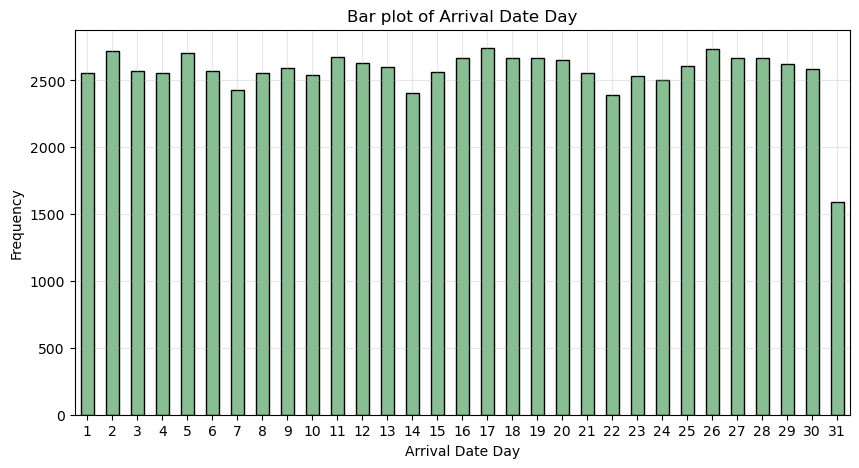

In [352]:
df['Arrival Date Day'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), color='#86bf91', edgecolor='black')
plt.xlabel('Arrival Date Day')
plt.ylabel('Frequency')
plt.title('Bar plot of Arrival Date Day')
plt.xticks(rotation=0)
plt.grid(alpha=0.3)
plt.show()

In [353]:
df['Arrival Date Month'].describe()

count      79536
unique        12
top       August
freq       11026
Name: Arrival Date Month, dtype: object

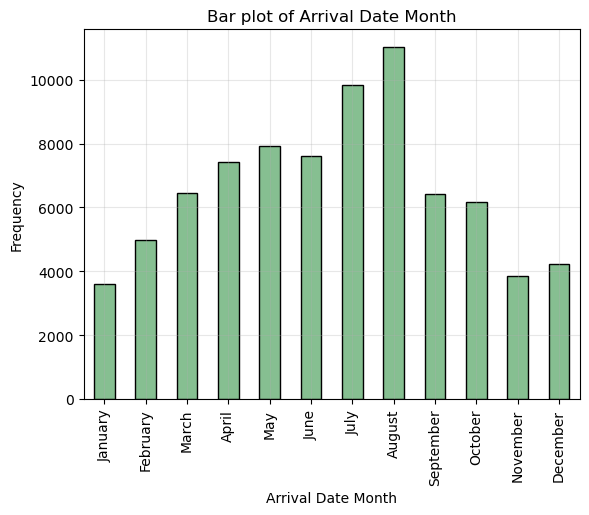

In [354]:
df['Arrival Date Month'].astype(CategoricalDtype(categories=month_order, ordered=True)).value_counts().sort_index().plot(kind='bar', color='#86bf91', edgecolor='black')
plt.xlabel('Arrival Date Month')
plt.ylabel('Frequency')
plt.title('Bar plot of Arrival Date Month')
plt.grid(alpha=0.3)
plt.show()

In [355]:
df['Arrival Date Year'].describe()

count    79536.000000
mean      2016.227092
std          0.682190
min       2015.000000
25%       2016.000000
50%       2016.000000
75%       2017.000000
max       2017.000000
Name: Arrival Date Year, dtype: float64

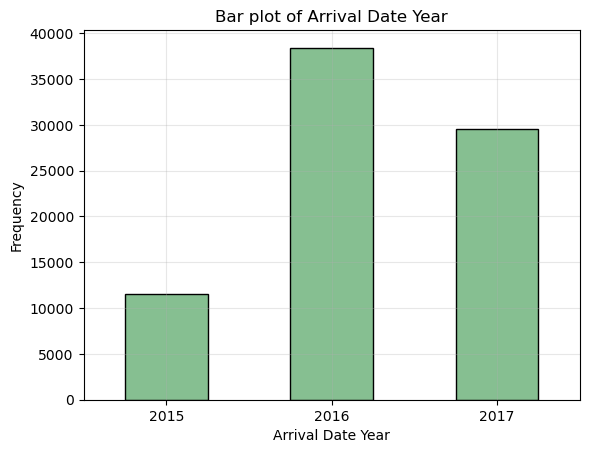

In [356]:
df['Arrival Date Year'].value_counts().sort_index().plot(kind='bar', color='#86bf91', edgecolor='black')
plt.xlabel('Arrival Date Year')
plt.ylabel('Frequency')
plt.title('Bar plot of Arrival Date Year')
plt.xticks(rotation=0)
plt.grid(alpha=0.3)
plt.show()

In [357]:
df['Country'].describe()

count     79536
unique      175
top         PRT
freq      23142
Name: Country, dtype: object

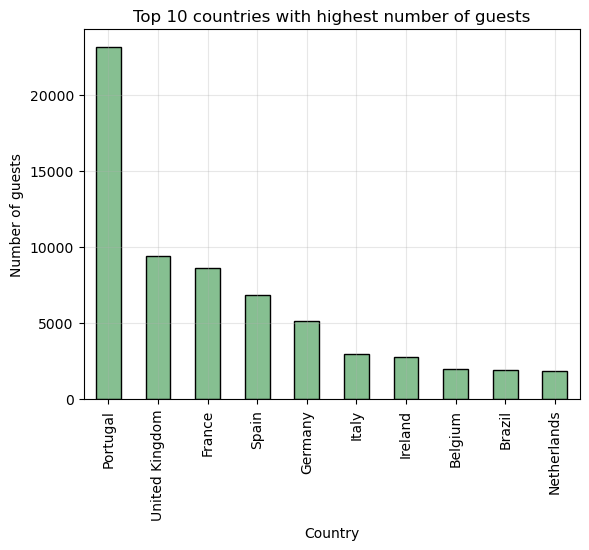

In [358]:
merged_df = pd.merge(df, country_codes_df, on='Country', how='left')

merged_df['Country Name'].value_counts().head(10).plot(kind='bar', color='#86bf91', edgecolor='black')
plt.xlabel('Country')
plt.ylabel('Number of guests')
plt.title('Top 10 countries with highest number of guests')
plt.grid(alpha=0.3)
plt.show()

In [359]:
df['Adults'].describe()

count    79536.000000
mean         1.913310
std          0.481261
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: Adults, dtype: float64

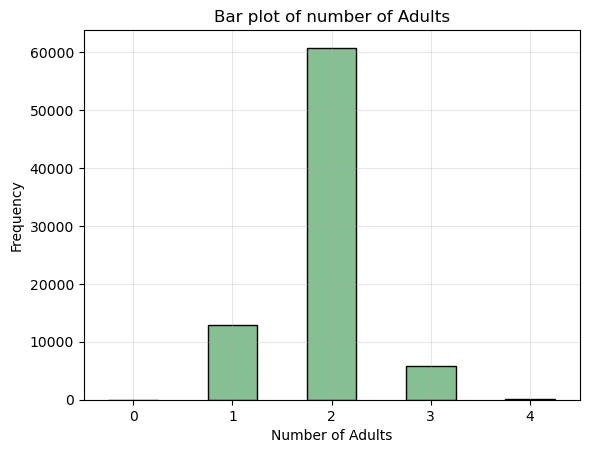

In [360]:
df['Adults'].value_counts().sort_index().plot(kind='bar', color='#86bf91', edgecolor='black')
plt.xlabel('Number of Adults')
plt.ylabel('Frequency')
plt.title('Bar plot of number of Adults')
plt.xticks(rotation=0)
plt.grid(alpha=0.3)
plt.show()

In [361]:
df['Children'].describe()

count    79536.000000
mean         0.144136
std          0.460901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: Children, dtype: float64

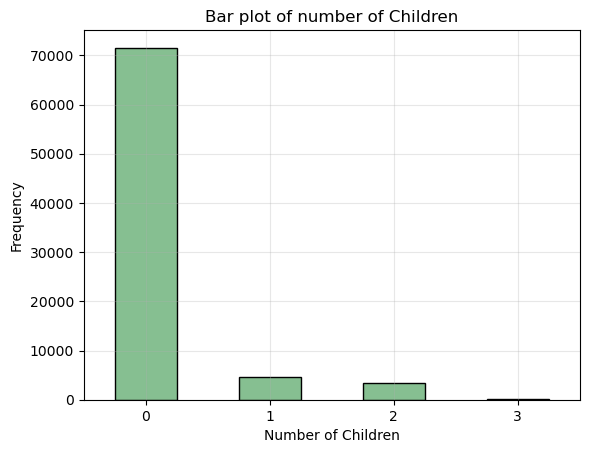

In [362]:
df['Children'].value_counts().sort_index().plot(kind='bar', color='#86bf91', edgecolor='black')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.title('Bar plot of number of Children')
plt.xticks(rotation=0)
plt.grid(alpha=0.3)
plt.show()

In [363]:
df['Market Segment'].describe()

count         79536
unique            7
top       Online TA
freq          49564
Name: Market Segment, dtype: object

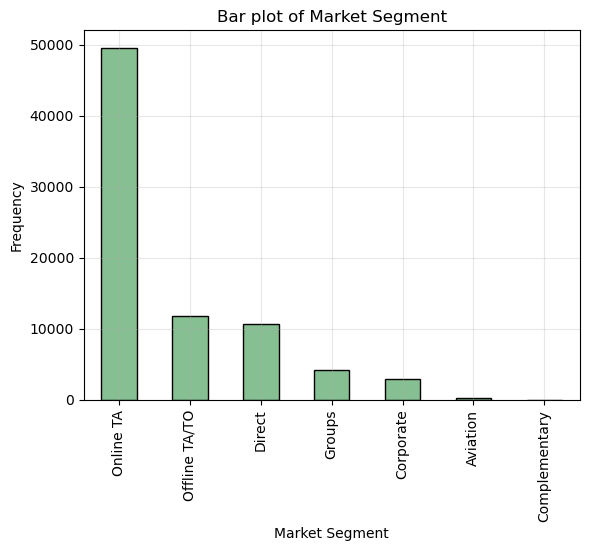

In [364]:
df['Market Segment'].value_counts().plot(kind='bar', color='#86bf91', edgecolor='black')
plt.xlabel('Market Segment')
plt.ylabel('Frequency')
plt.title('Bar plot of Market Segment')
plt.grid(alpha=0.3)
plt.show()

In [365]:
df['Agent'].describe()

count    79536.000000
mean        79.020984
std        108.631231
min          0.000000
25%          9.000000
50%          9.000000
75%        208.000000
max        535.000000
Name: Agent, dtype: float64

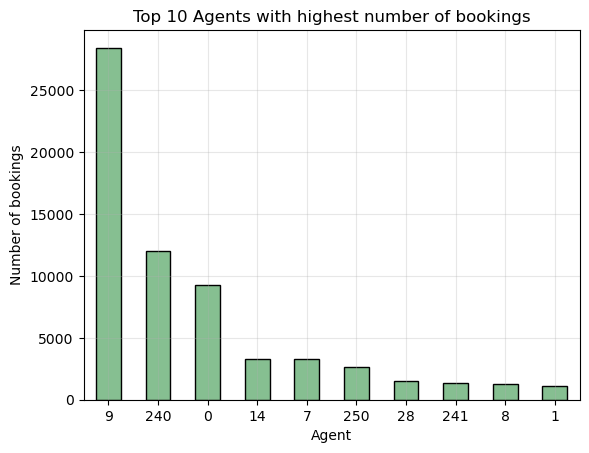

In [366]:
df['Agent'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', color='#86bf91', edgecolor='black')
plt.xlabel('Agent')
plt.ylabel('Number of bookings')
plt.title('Top 10 Agents with highest number of bookings')
plt.xticks(rotation=0)
plt.grid(alpha=0.3)
plt.show()

In [367]:
df['Customer Type'].describe()

count         79536
unique            4
top       Transient
freq          65915
Name: Customer Type, dtype: object

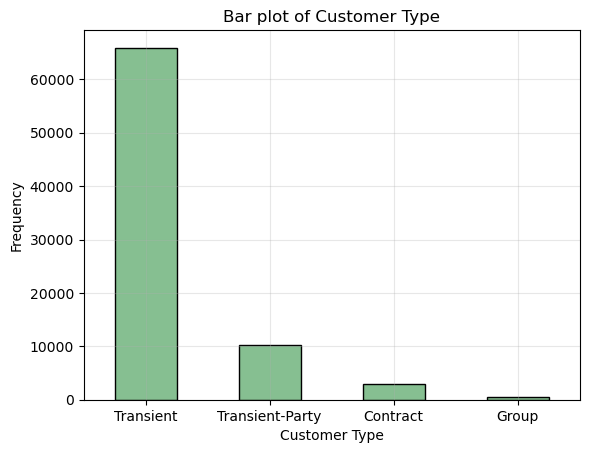

In [368]:
df['Customer Type'].value_counts().plot(kind='bar', color='#86bf91', edgecolor='black')
plt.xlabel('Customer Type')
plt.ylabel('Frequency')
plt.title('Bar plot of Customer Type')
plt.xticks(rotation=0)
plt.grid(alpha=0.3)
plt.show()

In [369]:
df['Average Daily Rate'].describe()

count    79536.000000
mean       113.919918
std         47.801892
min         45.050000
25%         79.200000
50%        104.000000
75%        138.550000
max        510.000000
Name: Average Daily Rate, dtype: float64

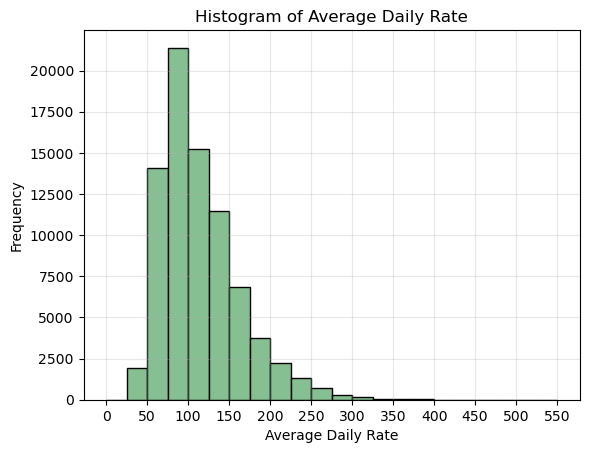

In [370]:
df['Average Daily Rate'].hist(bins=22, range=(0, 550), color='#86bf91', edgecolor='black')
plt.xlabel('Average Daily Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Average Daily Rate')
plt.xticks(range(0, 560, 50))
plt.grid(alpha=0.3)
plt.show()

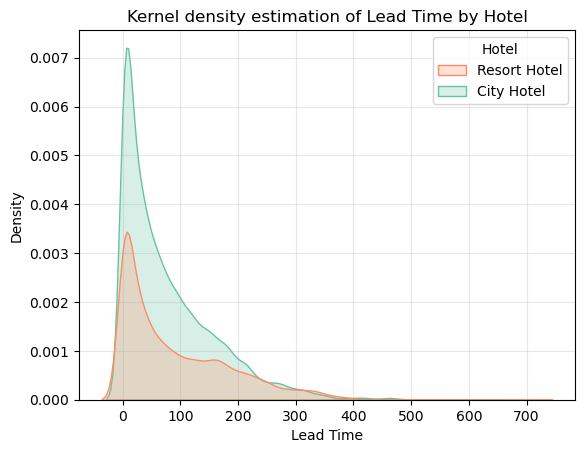

In [371]:
sns.kdeplot(data=df, x='Lead Time', hue='Hotel', fill=True, palette=list(reversed(sns.color_palette('Set2', n_colors=len(df['Hotel'].unique())))))
plt.title('Kernel density estimation of Lead Time by Hotel')
plt.grid(alpha=0.3)
plt.show()

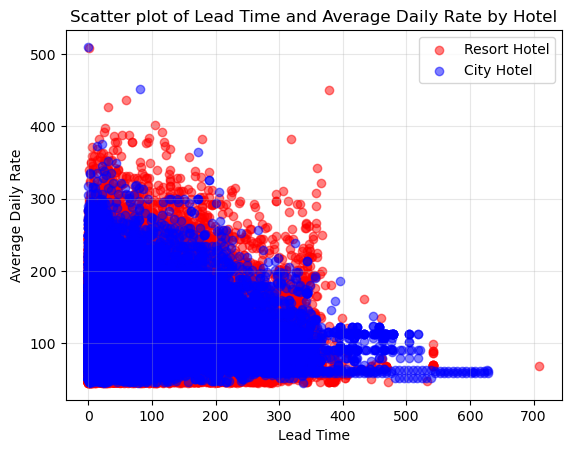

In [372]:
for i, hotel in enumerate(df['Hotel'].unique()):
    subset = df[df['Hotel'] == hotel]
    plt.scatter(subset['Lead Time'], subset['Average Daily Rate'], c=['r', 'b'][i], alpha=0.5, label=hotel)
plt.xlabel('Lead Time')
plt.ylabel('Average Daily Rate')
plt.title('Scatter plot of Lead Time and Average Daily Rate by Hotel')
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.show()

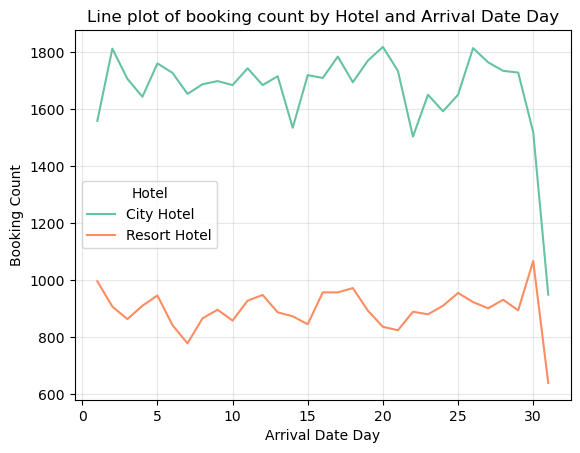

In [373]:
sns.lineplot(x='Arrival Date Day', y='Booking Count', hue='Hotel', data=df.groupby(['Hotel', 'Arrival Date Day']).size().reset_index(name='Booking Count'), palette='Set2')
plt.title('Line plot of booking count by Hotel and Arrival Date Day')
plt.grid(alpha=0.3)
plt.show()

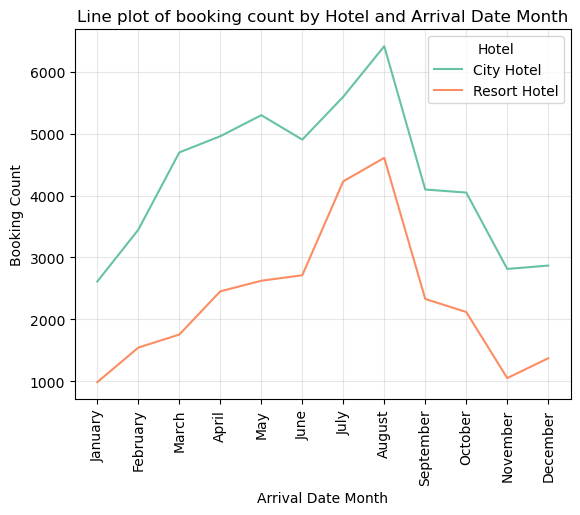

In [374]:
month_df = df.groupby(['Hotel', 'Arrival Date Month']).size().reset_index(name='Booking Count')
month_df['Arrival Date Month'] = pd.Categorical(month_df['Arrival Date Month'], categories=month_order, ordered=True)
month_df = month_df.sort_values(['Arrival Date Month'])

sns.lineplot(x='Arrival Date Month', y='Booking Count', hue='Hotel', data=month_df, palette='Set2')
plt.title('Line plot of booking count by Hotel and Arrival Date Month')
plt.xticks(rotation=90)
plt.grid(alpha=0.3)
plt.show()

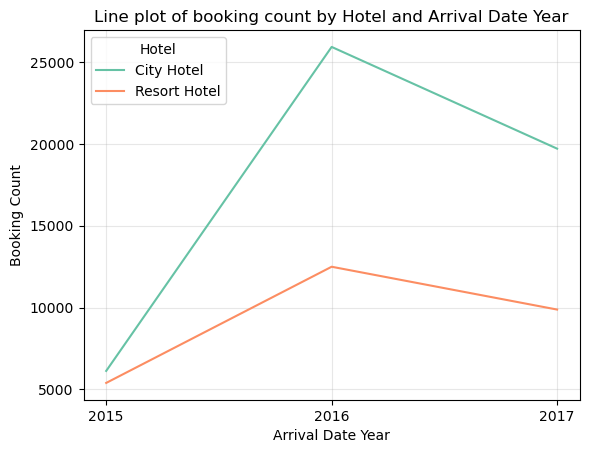

In [375]:
year_df = df.groupby(['Hotel', 'Arrival Date Year']).size().reset_index(name='Booking Count')
year_df['Arrival Date Year'] = year_df['Arrival Date Year'].astype(str)

sns.lineplot(x='Arrival Date Year', y='Booking Count', hue='Hotel', data=year_df, palette='Set2')
plt.title('Line plot of booking count by Hotel and Arrival Date Year')
plt.grid(alpha=0.3)
plt.show()

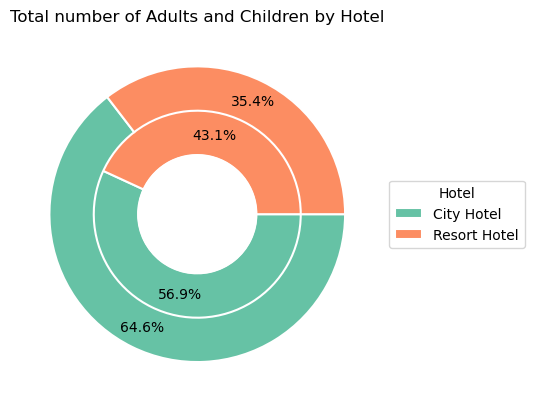

In [376]:
children_df = df.groupby(['Hotel'])['Children'].sum().reset_index(name='Total Children')
adults_df = df.groupby(['Hotel'])['Adults'].sum().reset_index(name='Total Adults')

fig, ax = plt.subplots()

colors = sns.color_palette('Set2')
autopct = '%1.1f%%'

wedges_children, _, _ = ax.pie(children_df['Total Children'], wedgeprops=dict(width=0.6), counterclock=False, colors=colors, autopct=autopct, pctdistance=0.55)
wedges_adults, _, _ = ax.pie(adults_df['Total Adults'], wedgeprops=dict(width=0.3), counterclock=False, colors=colors, autopct=autopct, pctdistance=0.85)

p=plt.gcf()
p.gca().add_artist(plt.Circle((0,0), 0.4, color='white'))

plt.setp(wedges_children, edgecolor='white', linewidth=1.5)
plt.setp(wedges_adults, edgecolor='white', linewidth=1.5)

ax.legend(wedges_adults, adults_df['Hotel'], title='Hotel', loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title('Total number of Adults and Children by Hotel')

plt.show()

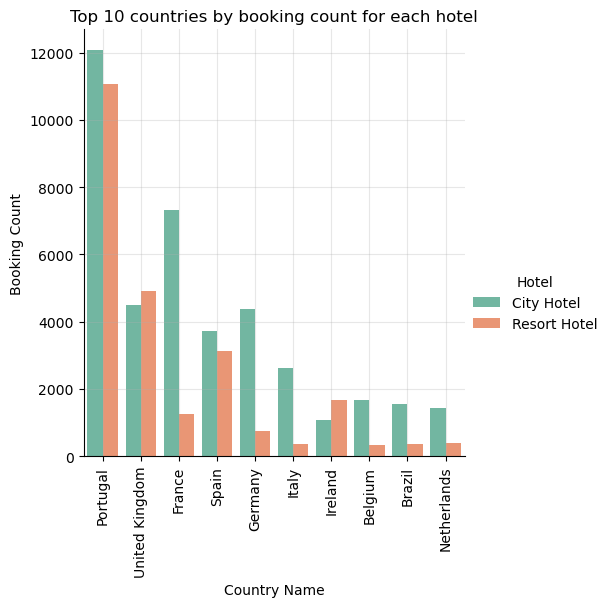

In [377]:
top_10_countries = merged_df.groupby('Country Name').size().sort_values(ascending=False).head(10).index.tolist()
top_10_countries_df = merged_df[merged_df['Country Name'].isin(top_10_countries)]

sns.catplot(x='Country Name',
            y='Booking Count',
            hue='Hotel',
            data=top_10_countries_df[['Hotel', 'Country Name']].groupby(['Hotel', 'Country Name']).size().reset_index(name='Booking Count'),
            kind='bar',
            order=top_10_countries,
            palette='Set2')
plt.title('Top 10 countries by booking count for each hotel')
plt.xticks(rotation=90)
plt.grid(alpha=0.3)
plt.show()

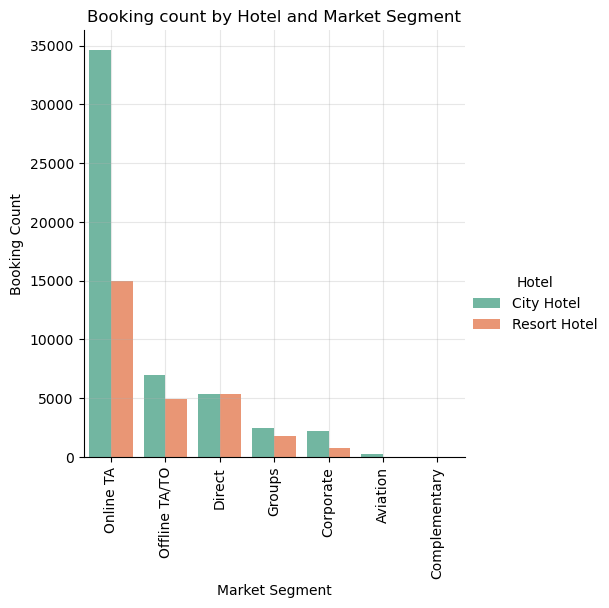

In [378]:
top_market_segment = df.groupby('Market Segment').size().sort_values(ascending=False).index.tolist()

sns.catplot(x='Market Segment',
            y='Booking Count',
            hue='Hotel',
            data=df.groupby(['Hotel', 'Market Segment']).size().reset_index(name='Booking Count'),
            kind='bar',
            order=top_market_segment,
            palette='Set2')
plt.title('Booking count by Hotel and Market Segment')
plt.xticks(rotation=90)
plt.grid(alpha=0.3)
plt.show()

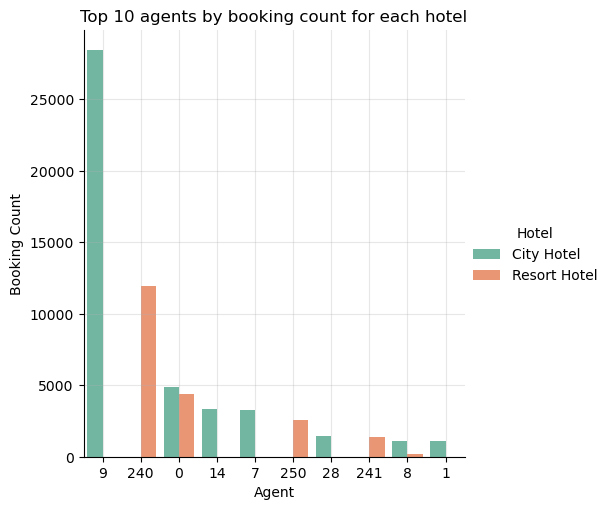

In [379]:
top_10_agent = merged_df.groupby('Agent').size().sort_values(ascending=False).head(10).index.tolist()
top_10_agent_df = merged_df[merged_df['Agent'].isin(top_10_agent)]

sns.catplot(x='Agent',
            y='Booking Count',
            hue='Hotel',
            data=top_10_agent_df[['Hotel', 'Agent']].groupby(['Hotel', 'Agent']).size().reset_index(name='Booking Count'),
            kind='bar',
            order=top_10_agent,
            palette='Set2')
plt.title('Top 10 agents by booking count for each hotel')
plt.grid(alpha=0.3)
plt.show()

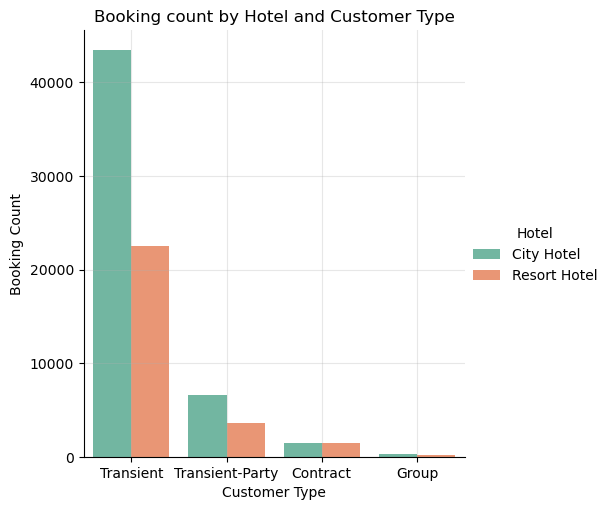

In [380]:
top_customer_type = df.groupby('Customer Type').size().sort_values(ascending=False).index.tolist()

sns.catplot(x='Customer Type',
            y='Booking Count',
            hue='Hotel',
            data=df.groupby(['Hotel', 'Customer Type']).size().reset_index(name='Booking Count'),
            kind='bar',
            order=top_customer_type,
            palette='Set2')
plt.title('Booking count by Hotel and Customer Type')
plt.grid(alpha=0.3)
plt.show()

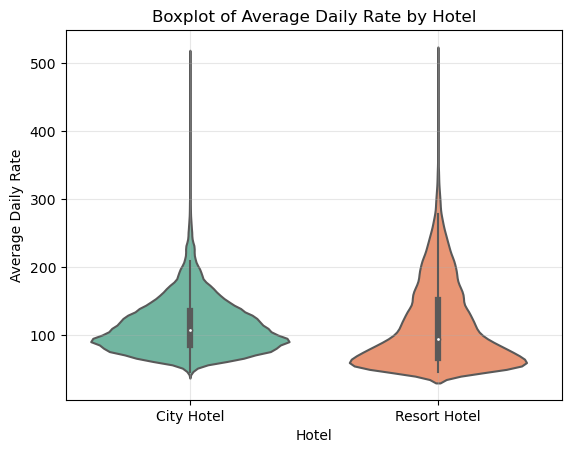

In [381]:
sns.violinplot(x='Hotel', y='Average Daily Rate', data=df.sort_values(by='Average Daily Rate', ascending=False), palette='Set2')
plt.title('Boxplot of Average Daily Rate by Hotel')
plt.grid(alpha=0.3)
plt.show()

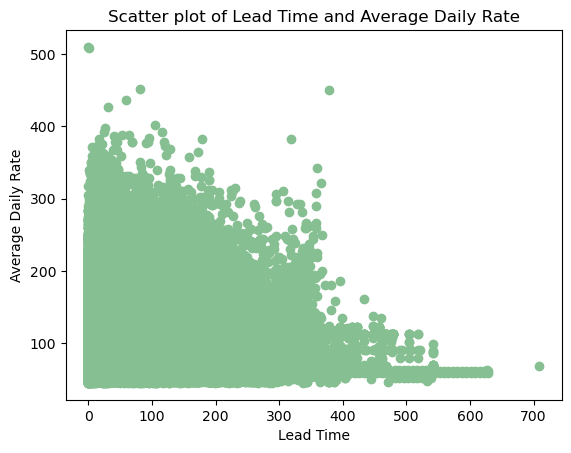

In [382]:
plt.scatter(df['Lead Time'], df['Average Daily Rate'], color='#86bf91')
plt.xlabel('Lead Time')
plt.ylabel('Average Daily Rate')
plt.title('Scatter plot of Lead Time and Average Daily Rate')
plt.show()

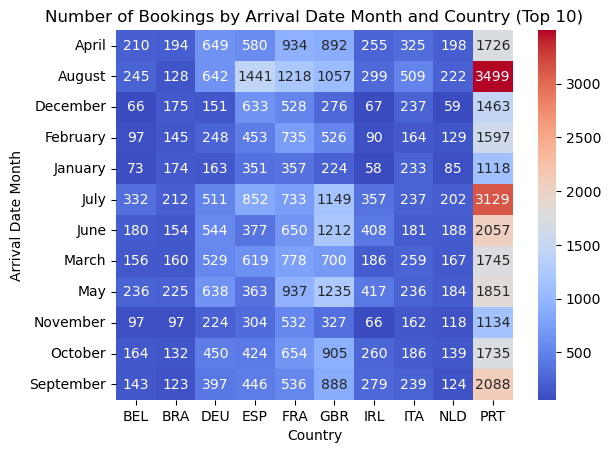

In [383]:
# Lấy danh sách 10 quốc gia có số lượng đặt phòng nhiều nhất
top_countries = df['Country'].value_counts().nlargest(10).index

# Tạo dataframe mới với các dòng có quốc gia nằm trong top 10
df_top_countries = df[df['Country'].isin(top_countries)]

# Tạo pivot table đếm số lượng đặt phòng theo tháng và quốc gia, sử dụng cột Average Daily Rate
df_pivot = pd.pivot_table(df_top_countries, values='Average Daily Rate', index='Arrival Date Month', columns='Country', aggfunc='count')

# Vẽ heatmap
sns.heatmap(df_pivot, cmap='coolwarm', annot=True, fmt='g')
plt.title('Number of Bookings by Arrival Date Month and Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Arrival Date Month')
plt.show()
